### Un poco de lectura

Los hiperparámetros que utiliza el Decision tree classifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Optimización de hiper-parámetros

### Recapitulando

In [138]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier

from skopt import gp_minimize
from skopt.space import Categorical, Dimension, Integer, Real  # noqa

#from IPython.display import Image  

In [139]:
directorio_data = '../data/'

x_training_file = directorio_data + 'x_traininig.csv'
y_training_file = directorio_data + 'y_traininig.csv'

x_testing_file = directorio_data + 'x_testing.csv'
y_testing_file = directorio_data + 'y_testing.csv'

In [140]:
df_x_training_validacion = pd.read_csv(x_training_file)
df_y_training_validacion = pd.read_csv(y_training_file)

X_testing = pd.read_csv(x_testing_file)
Y_testing = pd.read_csv(y_testing_file)

### Separamos nuestro dataset training-validación en training y validación

In [141]:
random_state = 661
test_size = 0.3

X_training, X_validacion, Y_training, Y_validacion = train_test_split(
    df_x_training_validacion, 
    df_y_training_validacion, 
    test_size=test_size, 
    random_state=random_state,
    stratify=df_y_training_validacion
)

### Dejamos solo las columnas que queremos

In [142]:
columnas = [
    "review_overall",
    "review_aroma",
    "review_appearance",
    "review_palate",
    "review_taste",
    "beer_abv"
]

In [143]:
X_training_validacion = df_x_training_validacion.copy()[columnas]
X_training = X_training[columnas]
X_validacion = X_validacion[columnas]
X_testing = X_testing[columnas]

## Optimización con grid search

Vamos a optimizar el parámetro "max_depth" probando con diferentes valores

In [148]:
punto_de_corte = 0.11111111

max_depth_grid_search = [1,2,3,4,5,6,7,8,9,10,11,12]

for max_depth in max_depth_grid_search:
    print("max depth:", max_depth)
    #Creamos el árbol con los parámeros
    criterion='gini'
    clf = DecisionTreeClassifier(
                criterion = criterion,
                max_depth=max_depth,
                random_state=random_state
            )
    _ = clf.fit(X_training, Y_training)
    
    #Predecimos en validación
    Y_validacion_pred_proba = clf.predict_proba(X_validacion)
    Y_validacion_pred_proba = pd.DataFrame(Y_validacion_pred_proba, columns = ['NO_prob', 'SI_prob'])
    Y_validacion_pred_proba['prediccion'] = 'NO'
    Y_validacion_pred_proba.loc[Y_validacion_pred_proba['SI_prob']>punto_de_corte,'prediccion'] = 'SI'
    cm = confusion_matrix(Y_validacion, Y_validacion_pred_proba['prediccion'], labels=['SI', 'NO'])
    true_positives = cm[0,0]
    true_negatives = cm[1,1]
    false_positives = cm[1, 0]
    false_negatives = cm[0,1]
    metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
    print("    metrica: ", metrica_negocio)
    

max depth: 1
    metrica:  0.0
max depth: 2
    metrica:  0.0
max depth: 3
    metrica:  16.736401673640167
max depth: 4
    metrica:  43.93305439330544
max depth: 5
    metrica:  334.72803347280336
max depth: 6
    metrica:  345.1882845188284
max depth: 7
    metrica:  207.11297071129707
max depth: 8
    metrica:  309.6234309623431
max depth: 9
    metrica:  303.34728033472805
max depth: 10
    metrica:  372.3849372384937
max depth: 11
    metrica:  364.01673640167365
max depth: 12
    metrica:  309.6234309623431


## Optimización con grid search, dos parámetros
Vamos a optimizar el parámetro "max_depth" y "min_samples_leaf"

In [149]:
12*12

144

In [150]:
punto_de_corte = 0.11111111

max_depth_grid_search = [1,2,3,4,5,6,7,8,9,10,11,12]

min_samples_leaf_search = [1,2,3,4,5,6,7,8,9,10,11,12]

for max_depth in max_depth_grid_search:
    print("max depth:", max_depth)
    for min_samples_leaf in min_samples_leaf_search:
        print("    min samples leaf:", min_samples_leaf)
        #Creamos el árbol con los parámeros
        criterion='gini'
        clf = DecisionTreeClassifier(
                    criterion = criterion,
                    max_depth=max_depth,
                    min_samples_leaf = min_samples_leaf,
                    random_state=random_state
                )
        _ = clf.fit(X_training, Y_training)

        #Predecimos en validación
        Y_validacion_pred_proba = clf.predict_proba(X_validacion)
        Y_validacion_pred_proba = pd.DataFrame(Y_validacion_pred_proba, columns = ['NO_prob', 'SI_prob'])
        Y_validacion_pred_proba['prediccion'] = 'NO'
        Y_validacion_pred_proba.loc[Y_validacion_pred_proba['SI_prob']>punto_de_corte,'prediccion'] = 'SI'
        cm = confusion_matrix(Y_validacion, Y_validacion_pred_proba['prediccion'], labels=['SI', 'NO'])
        true_positives = cm[0,0]
        true_negatives = cm[1,1]
        false_positives = cm[1, 0]
        false_negatives = cm[0,1]
        metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
        print("        metrica: ", metrica_negocio)
    

max depth: 1
    min samples leaf: 1
        metrica:  0.0
    min samples leaf: 2
        metrica:  0.0
    min samples leaf: 3
        metrica:  0.0
    min samples leaf: 4
        metrica:  0.0
    min samples leaf: 5
        metrica:  0.0
    min samples leaf: 6
        metrica:  0.0
    min samples leaf: 7
        metrica:  0.0
    min samples leaf: 8
        metrica:  0.0
    min samples leaf: 9
        metrica:  0.0
    min samples leaf: 10
        metrica:  0.0
    min samples leaf: 11
        metrica:  0.0
    min samples leaf: 12
        metrica:  0.0
max depth: 2
    min samples leaf: 1
        metrica:  0.0
    min samples leaf: 2
        metrica:  0.0
    min samples leaf: 3
        metrica:  0.0
    min samples leaf: 4
        metrica:  0.0
    min samples leaf: 5
        metrica:  0.0
    min samples leaf: 6
        metrica:  0.0
    min samples leaf: 7
        metrica:  0.0
    min samples leaf: 8
        metrica:  0.0
    min samples leaf: 9
        metrica:  0.0
    m

### Un paréntesis - Cross validation

![image info](../img/K-fold_cross_validation.jpg)

### Otras estrategias - Optimización bayesiana

![image info](../img/optimizacion_bayesiana.gif)

In [151]:
def cv_con_umbral_de_corte(params):
    umbral_corte = params[0]
    max_depth = params[1]
    min_samples_split = params[2]
    min_samples_leaf = params[3]
    
    X = X_training_validacion
    y = df_y_training_validacion
    criterion='gini'
    clf = DecisionTreeClassifier(
                criterion = criterion,
                max_depth=max_depth,
                max_features=max_features,
                min_samples_split=min_samples_split,
                min_samples_leaf=min_samples_leaf,
                random_state=1
            )

    # 5-fold cross validation
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    def metrica_de_negocio(clf, X, y):
        y_pred = clf.predict_proba(X)
        df_y_pred_proba = pd.DataFrame(y_pred, columns = ['NO_prob', 'SI_prob'])
        df_y_pred_proba['prediccion'] = 'NO'
        df_y_pred_proba.loc[df_y_pred_proba['SI_prob']>umbral_corte,'prediccion'] = 'SI'
        
        cm = confusion_matrix(y, df_y_pred_proba['prediccion'], labels=['SI', 'NO'])
        true_positives = cm[0,0]
        true_negatives = cm[1,1]
        false_positives = cm[1, 0]
        false_negatives = cm[0,1]
        metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)
        
        return {
            'metrica_negocio': metrica_negocio,
        }
    
    scores = cross_validate(clf, X, y, scoring=metrica_de_negocio, cv=cv)
    
    resultados = {
        'metrica negocio':         round(np.mean(scores['test_metrica_negocio']),2)
    }
    return -resultados['metrica negocio']

In [152]:
import warnings
warnings.filterwarnings('ignore')

[0.1622462419643353, 10, 2, 1]

space  = [
    Real(0.01, 0.2, name='umbral_corte'),0.1622462419643353
    Integer(1, 10, name = 'max_depth'),10
    Integer(2, 10000, name = 'min_samples_split'), 2
    Integer(1, 10000, name = 'min_samples_leaf')1
]

res = gp_minimize(cv_con_umbral_de_corte,                  # the function to minimize
                  space,     # the bounds on each dimension of x
                  n_initial_points = 10,
                  n_calls=150,         # the number of evaluations of f including at x0
                  n_random_starts=10,  # the number of random initialization points
                  random_state=777,
                  x0 = [
                      [0.11111112, 4, 2, 1]
                  ],
                  callback = lambda res: print([
                          len(res.func_vals), 
                          res.x_iters[len(res.x_iters)-1], 
                          -res.func_vals[len(res.func_vals)-1]
                      ])
                 )

[1, [0.11111112, 4, 2, 1], 205.61]
[2, [0.13282545333689272, 3, 6363, 2481], 0.0]
[3, [0.11707051833070396, 7, 7564, 8828], 0.0]
[4, [0.08371748329971408, 4, 3877, 5205], 0.0]
[5, [0.08341566909279453, 10, 9348, 3931], 0.0]
[6, [0.18663841884530188, 8, 1199, 8022], 0.0]
[7, [0.19138095069992617, 3, 5510, 2197], 0.0]
[8, [0.05120122051040535, 1, 467, 6049], 0.0]
[9, [0.19380467463371795, 1, 8832, 320], 0.0]
[10, [0.1658136558836046, 8, 845, 6222], 0.0]
[11, [0.1651480759696521, 9, 5167, 5362], 0.0]
[12, [0.01, 10, 2, 1], -4553.87]
[13, [0.10998517316168964, 2, 2, 1], 0.0]
[14, [0.06250808933441149, 1, 2, 1], 0.0]
[15, [0.09991662765518612, 10, 2, 10000], 0.0]
[16, [0.2, 10, 2, 10000], 0.0]
[17, [0.1492136390696992, 1, 2, 1], 0.0]
[18, [0.06071134827864604, 10, 10000, 10000], 0.0]
[19, [0.10943160143641656, 4, 146, 1], 197.16]
[20, [0.01, 10, 10000, 4866], -8942.65]
[21, [0.12520558633687878, 10, 2, 10000], 0.0]
[22, [0.06666603291382098, 10, 6248, 10000], 0.0]
[23, [0.15472386944112812,

In [153]:
[res.x, -res.fun]

[[0.1622462419643353, 10, 2, 1], 288.05]

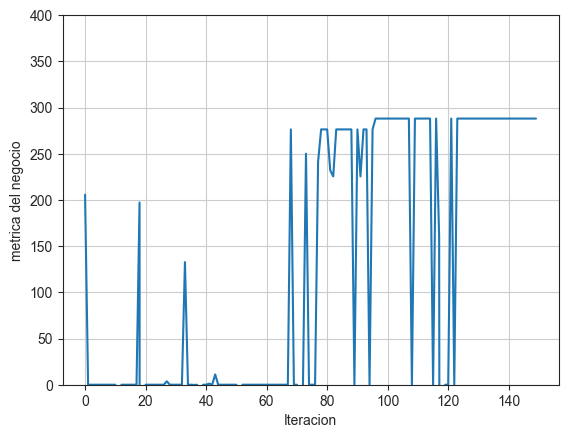

In [154]:
sns.set_style("ticks",{'axes.grid' : True})

chart_df = pd.DataFrame(data = -res.func_vals, columns=['y'])
chart_df.reset_index(inplace=True)
chart_df.columns = ['iteracion', 'metrica negocio']
g1 = sns.lineplot(data=chart_df, x="iteracion", y="metrica negocio")
g1.set(xlabel='Iteracion', ylabel='metrica del negocio')
g1.set(ylim=(0, 400))
plt.show()

### Los mejores parámetros hallados para construir un modelo

In [125]:
umbral_corte = res.x[0]
max_depth = res.x[1]
min_samples_split = res.x[2]
min_samples_leaf = res.x[3]

print({
    'umbral de corte': umbral_corte,
    'max depth': max_depth,
    'min samples split': min_samples_split,
    'min samples leaf': min_samples_leaf
})

{'umbral de corte': 0.1622462419643353, 'max depth': 10, 'min samples split': 2, 'min samples leaf': 1}


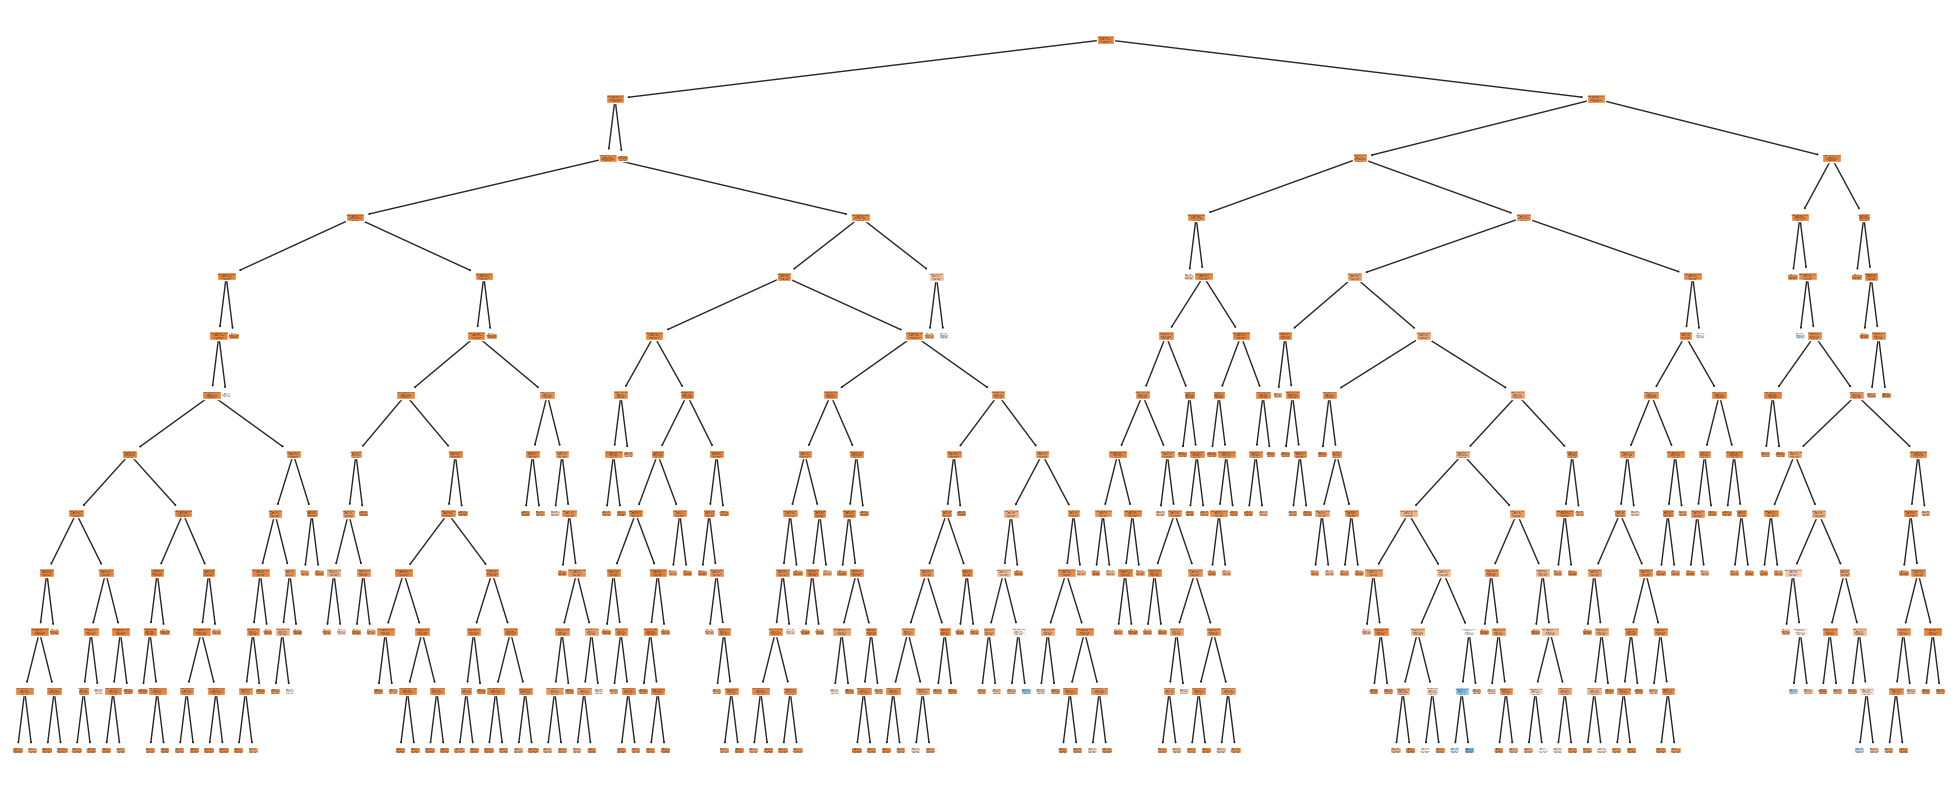

In [159]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(clf, 
                   feature_names=X_training.columns,  
                   class_names=Y_training['POPULAR'].unique(),
                   filled=True)

### Construimos nuestro modelo

In [155]:
clf = DecisionTreeClassifier(
            criterion = criterion,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            random_state=1
        )

### Lo entrenamos con los datos de trainining - validacion

In [156]:
x = X_training_validacion
y = df_y_training_validacion['POPULAR']
_ = clf.fit(x, y)

### Realizamos la predicción sobre los datos de testing

In [157]:
y_pred = clf.predict_proba(X_testing)
df_y_pred_proba = pd.DataFrame(y_pred, columns = ['NO_prob', 'SI_prob'])
df_y_pred_proba['prediccion'] = 'NO'
df_y_pred_proba.loc[df_y_pred_proba['SI_prob']>umbral_corte,'prediccion'] = 'SI'
df_y_pred_proba

,NO_prob,SI_prob,prediccion
0,0.996489,0.003511,NO
1,0.966728,0.033272,NO
2,1.000000,0.000000,NO
3,0.986891,0.013109,NO
4,1.000000,0.000000,NO
...,...,...,...
9795,1.000000,0.000000,NO
9796,1.000000,0.000000,NO
9797,1.000000,0.000000,NO
9798,0.996489,0.003511,NO


In [158]:
cm = confusion_matrix(Y_testing, df_y_pred_proba['prediccion'], labels=['SI', 'NO'])
true_positives = cm[0,0]
true_negatives = cm[1,1]
false_positives = cm[1, 0]
false_negatives = cm[0,1]
metrica_negocio = ((4000*true_positives) - (500*false_positives))/(true_positives + false_negatives)

metrica_negocio

475.0

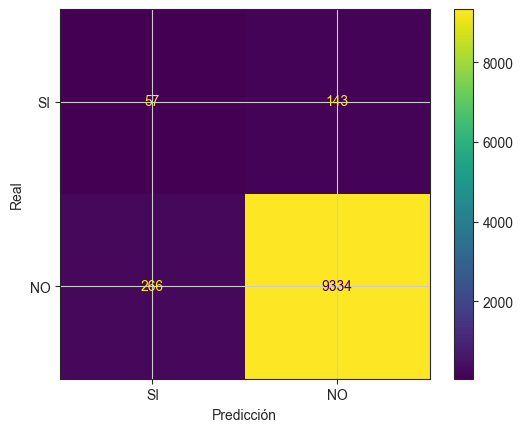

In [160]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['SI', 'NO'])
disp.plot()
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()